In [161]:
import gym
from gym import spaces
from gym.utils import seeding
from gym.envs.registration import register
import numpy as np

class LineSpikeWorld():
    """
    """
    def __init__(self, n=6):

        # Initialzing required parameters
        self.update_count = 0
        self.n = n # Length of the chain
        self.state = 0  # Start at middle of the chain
        self.action_space = spaces.Discrete(2) # Number of actions: 2 - [0: left, 1: right]
        self.observation_space = spaces.Discrete(self.n) # number of states is equal to chain length
        
        # Setting reward values
        self.R = -np.ones(n)
        
        self.seed() # not sure what this does, so not changing it

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        '''
        takes an action as an argument and returns the next_state, reward, done, info.
        '''
        
        # Making sure valid action is chosen
        assert self.action_space.contains(action)

        self.update_count += 1

        # Stepping along on the chain
        if(action == 0):
            self.state = self.state - 1
        else:
            self.state = self.state + 1

        # Because this is a continuing case
        reward = self.R[self.state]
        if((self.state == self.n-1) or (self.state == 0)):
            done = True
        else:
            done = False

        return self.state, reward, done, {}

    def reset(self):
        '''
        transitions back to first state
        '''
        self.update_count = 0 
        self.state = 0
        return self.state

In [162]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
from PIL import Image, ImageDraw, ImageFont
from random import sample

class predictionAgentQ:
    # Setting things up
    def __init__(self, env, gamma = 1):
        self.noStates = env.observation_space.n
        self.noActions = env.action_space.n
        self.env = env
        self.V = np.zeros(self.noStates)
        self.gamma = gamma
        
    def reset(self):
        self.V = np.zeros(self.noStates)
        
    def value(self):
        return self.V
    
    # Function for Qlearning policy updates
    def update(self, S, R, S2, lr=0.1):
        self.V[S] = self.V[S] + lr * (R + self.gamma * self.V[S2] - self.V[S])
        
class predictionAgentSR:
    # Setting things up
    def __init__(self, env, gamma = 1):
        self.noStates = env.observation_space.n
        self.env = env
        self.R = np.zeros(self.noStates)
        self.M = np.zeros((self.noStates, self.noStates))
        self.gamma = gamma
        
    def value(self):
        return self.M @ self.R
        
    def reset(self):
        self.R = np.zeros(self.noStates)
    
    # Function for Qlearning policy updates
    def update(self, S, R, S2, lr=0.1):
        one_hot = np.zeros(self.noStates)
        one_hot[S] = 1
        self.M[S,:] = self.M[S,:] + lr * (one_hot + self.gamma * self.M[S2,:] - self.M[S,:])
        self.R[S] = self.R[S] + lr * (R - self.R[S])
        
class predictionAgentFixedRep:
    # Setting things up
    def __init__(self, env, M, gamma = 1):
        self.noStates = env.observation_space.n
        self.env = env
        self.R = np.zeros(self.noStates)
        self.M = M
        self.gamma = gamma
        
    def value(self):
        return self.M @ self.R
        
    def reset(self):
        self.R = np.zeros(self.noStates)
    
    # Function for Qlearning policy updates
    def update(self, S, R, S2, lr=0.1):
        self.R[S] = self.R[S] + lr * (R - self.R[S])

In [177]:
# Loading required libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from random import sample

# Creating the agent and setting up other params
env = LineSpikeWorld()
agent_sr = predictionAgentSR(env)
agent_q = predictionAgentQ(env)
agent_fixed = predictionAgentFixedRep(env, M=M)
no_states = env.observation_space.n
no_episodes = 200
lr = 0.2
error_sr = []
error_q = []
error_fixed = []
V_true = -np.arange(6,0,-1)+1

# Running a loop for each episode
for i in tqdm(range(no_episodes), leave=True):
	# reset environment
    state = env.reset()
    if(i == 100):
        env.R = -2*np.ones(env.n)
        V_true = 2*V_true
        agent_sr.reset()

    for t in range(horizon):
        # always go right
        action = 1
        state2, r, done, _ = env.step(action)
        print(r, state)
        
        agent_sr.update(state, r, state2)
        agent_q.update(state, r, state2)
        agent_fixed.update(state, r, state2)
        
        error_sr.append(np.mean((agent_sr.value()-V_true)**2))
        error_q.append(np.mean((agent_q.value()-V_true)**2))
        error_fixed.append(np.mean((agent_fixed.value()-V_true)**2))
        
        
        if(done):
            break
        state = state2

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2
-1.0 3
-1.0 4
-1.0 0
-1.0 1
-1.0 2

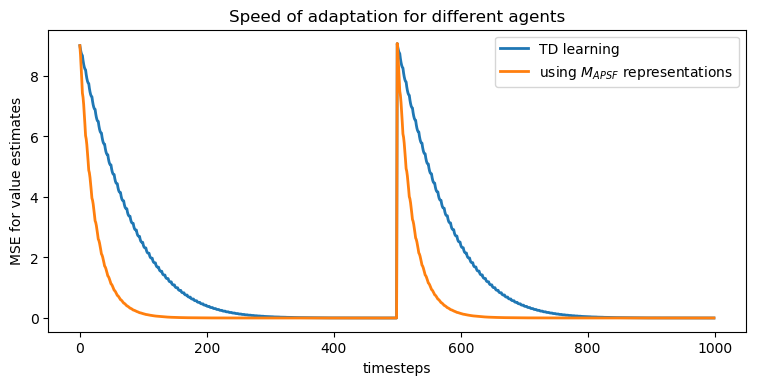

In [183]:
# plt.plot(agent.V)
plt.figure(figsize=(9,4), dpi=100)
# plt.plot(error_sr, 'k',label='SR learning', linewidth=3)
plt.plot(error_q, label='TD learning', linewidth=2)
plt.plot(error_fixed, label='using $M_{APSF}$ representations', linewidth=2)
plt.title('Speed of adaptation for different agents')
plt.legend(), plt.ylabel('MSE for value estimates'), plt.xlabel('timesteps')
plt.show()

In [163]:
V_true = -np.arange(6,0,-1)+1
M = agent_sr.M
print(V_true)

[-5 -4 -3 -2 -1  0]
